In [2]:
#imports
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Operator, Statevector
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
aer_backend = AerSimulator()
sv_backend = Aer.get_backend("statevector_simulator")

### NOT-Gate Circuit, Operator, State Vector

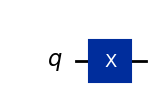

In [7]:
#NOT gate
not_circuit = QuantumCircuit(1)
not_circuit.x(0)
not_circuit.draw("mpl")

In [8]:
Operator(not_circuit)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


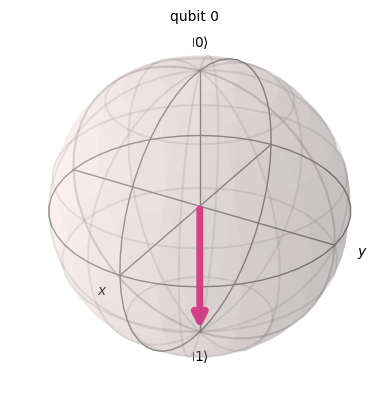

In [9]:
state = sv_backend.run(not_circuit).result().get_statevector()
print(state)
plot_bloch_multivector(state)

### superposition

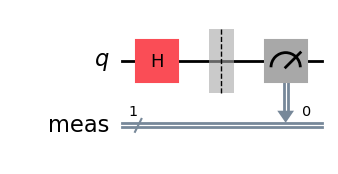

In [10]:
# superposition
superposition_circuit = QuantumCircuit(1)
superposition_circuit.h(0)
superposition_circuit.measure_all()
superposition_circuit.draw("mpl")

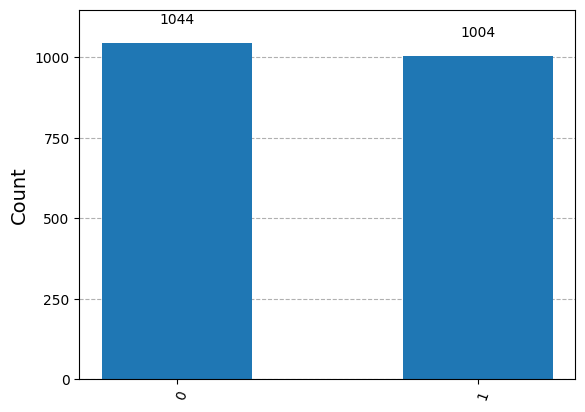

In [11]:
# evaluate
job = aer_backend.run(superposition_circuit, shots=2048)
counts = job.result().get_counts()
plot_histogram(counts)

### Bell State Circuit

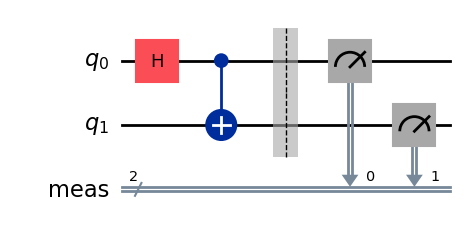

In [12]:
bell_circuit = QuantumCircuit(2)
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.measure_all()
bell_circuit.draw("mpl")

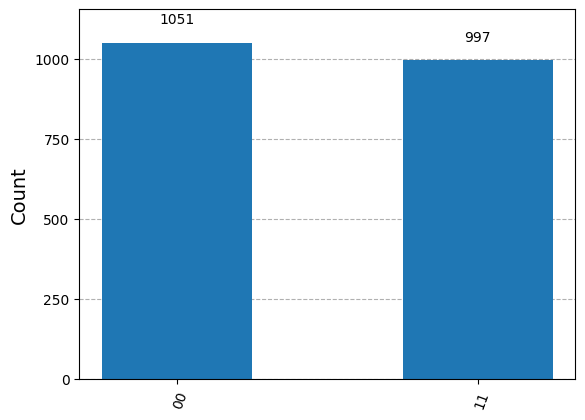

In [13]:
bell_counts = aer_backend.run(bell_circuit, shots=2048).result().get_counts()
plot_histogram(bell_counts)

### GHZ

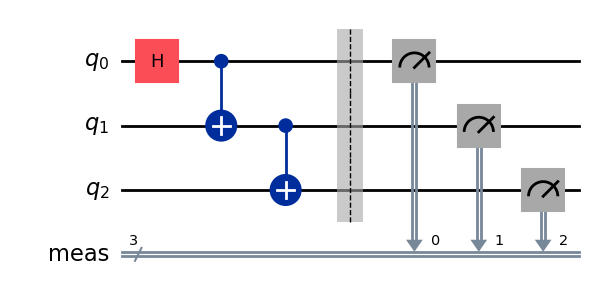

In [14]:
n_qubits = 3
ghz_circuit = QuantumCircuit(n_qubits)
ghz_circuit.h(0)
for i in range(n_qubits-1):
    ghz_circuit.cx(i, i+1)
ghz_circuit.measure_all()
ghz_circuit.draw("mpl")

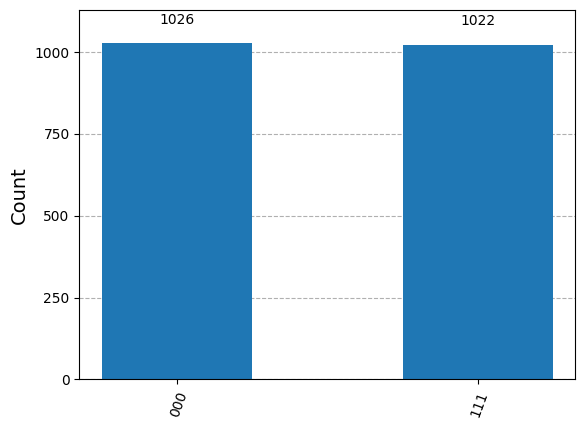

In [15]:
ghz_counts = aer_backend.run(ghz_circuit, shots=2048).result().get_counts()
plot_histogram(ghz_counts)